# <span style="color:blue">Esercitazione 1</span>

### Esercizio 01.1
Nel primo esercizio la richiesta era quella di testare il generatore di numeri pseudo-casuali fornitoci attraverso un analisi delle caratteristiche principali (media e varianza dei numeri estratti) ed un test del $\chi^2$.

Per il calcolo delle incertezze si è utilizzato (e si utilizzerà sempre) il metodo delle medie a blocchi (blocking method).\
Così per il calcolo del valore di aspettazione dei numeri pseudo-casuali estratti ho sostanzialmente ripetuto la misura della loro media in totale per $N=100$ volte, mediando separatamente i $M=10^6$ numeri estratti suddividendoli in blocchi da $M/N=10^4$ elementi ciascuno.
Il risultato finale (sempre più accurato col progressivo aumento del numero di blocchi utilizzati) si ottiene quindi mediando gli output dei singoli blocchi, mentre la sua incertezza è data dalla deviazione standard della media di questo insieme di risultati.

Tutto ciò discende dal Teorema del Limite Centrale: la misura di una particolare grandezza in esame (qui la media di un insieme di numeri estratti uniformemente) segue una certa, in generale ignota, distribuzione di probabilità (qui una gaussiana ancora per il CLT), legata all'incertezza statistica tipica dell'algoritmo stocastico utilizzato; la media di una serie di queste misure seguirà invece (sotto le ipotesi del CLT) una distribuzione gaussiana centrata sul valore di aspettazione della distribuzione di partenza $\mu$ con una varianza $\sigma^2/N$ pari a quella della stessa distribuzione divisa per il numero di istanze mediate. La migliore stima di questi parametri è infine ottenuta con la media dei risultati a disposizione e col quadrato della loro deviazione standard della media.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl

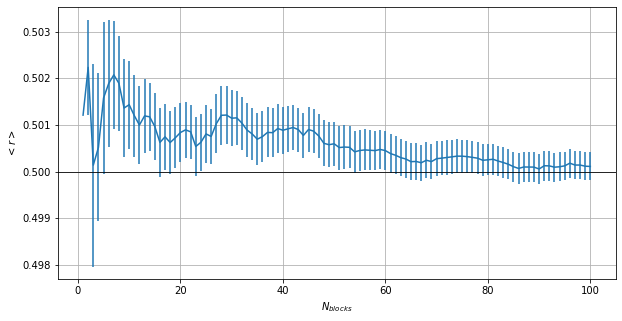

In [2]:
M,N=np.loadtxt('res01.out',delimiter=',',max_rows=1)  # Number of throws and blocks
data=np.genfromtxt('res01.out',skip_header=1,delimiter=',',names='res,err,resS,errS,Chi')
x=np.arange(N)         # [0,1,2,...,N-1]

pl.figure(figsize=(10,5))
pl.errorbar(x+1,data['res'],yerr=data['err'])
pl.xlabel(r'$N_{blocks}$')
pl.ylabel(r'$<r>$')
pl.grid(True)
pl.axhline(y=0.5,color='k',linewidth=0.8)
pl.show()

Il grafico rappresenta l'andamento della stima finale al crescere del numero di blocchi utilizzati per la misura. Come era da aspettarsi, la media dei numeri estratti converge a $\mu=0.5$. Inoltre già da subito lo scostamento dal valore atteso è piuttosto piccolo, cosa che indica una buona uniformità della copertura dell'intervallo $[0,1)$ da parte del generatore di numeri casuali.

$N=100$ risulta sufficientemente alto da produrre un'incertezza abbastanza piccola, ma ancora abbastnaza piccolo da evitare flulttuazioni troppo forti nelle stime dei singoli blocchi o correlazioni intra-blocco tra le singole misure, e quindi una sottostima dell'incertezza.

Per la stima della varianza ho proceduto nello stesso modo.

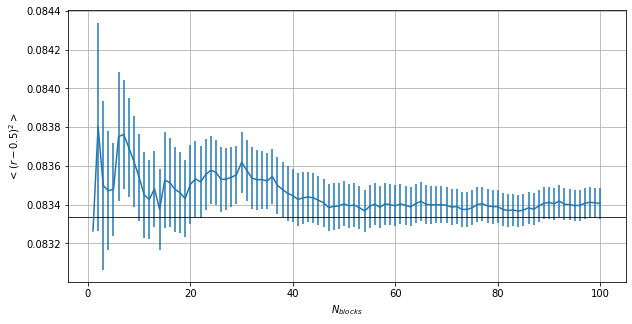

In [3]:
pl.figure(figsize=(10,5))
pl.errorbar(x+1,data['resS'],yerr=data['errS'])
pl.xlabel('$N_{blocks}$')
pl.ylabel('$<(r-0.5)^2>$')
pl.grid(True)
pl.axhline(y=1/12,color='k',linewidth=0.8)
pl.show()

Anche qui è evidente la compatibilità con il valore atteso.

Per valutare più quantitativamente la bontà del generatore di numeri casuali ho suddiviso l'intervallo $[0,1)$ in $N=100$ sottointervalli di larghezza $0.01$ e ho quindi implementato un test del $\chi^2$ sul numero di estrazioni che cadono all'interno di ognuno di essi. Dopo $j$ intervalli analizzati si ha
$$\chi^2_j = \sum_{i=1}^j \frac{\left( O_i - E_i \right)^2}{E_i}
         = \sum_{i=1}^j \frac{\left( n_i - L/N \right)^2}{L/N}$$
dove $O_i=n_i$ è la misura $i$-esima, $L=10^4$ sono i numeri estratti per blocco (per la misura sull'intervallo $i$-esimo ho utilizzato tutti e soli i valori dell'$i$-esimo blocco) e $E_i=L/N=100$ è il risultato atteso per tutte le misure (distribuzione uniforme). In generale al denominatore dovrebbe comparire la varianza della distribuzione delle singole misure. Questa si traduce nel loro valore atteso grazie alle proprietà della distribuzione binomiale, che governa gli esperimenti di conteggio: per una probabilità di successo sufficientemente piccola (e qui $p=0.01$)
si ha $\sigma^2=np(1-p) \simeq np = \mu$, valore atteso.

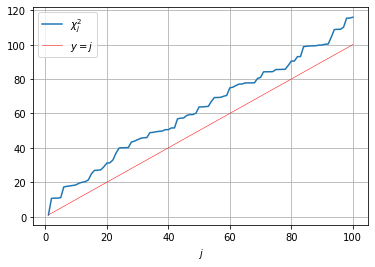

In [4]:
x=np.arange(N)    # Number of sub-intervals of [0,1]
pl.plot(x+1,data['Chi'],label='$\chi^2_j$')
pl.plot(x+1,x+1,linewidth=0.5,color='r',label='$y=j$')
pl.legend(loc='best')
pl.xlabel('$j$')
pl.grid(True)
pl.show()

Per avere in qualche modo conferma della bontà del generatore dobbiamo aspettarci che $\chi^2$ cresca in media linearmente con $j$ (linea arancione nel grafico), in quanto dovrebbe essere $(n_i-L/N)^2 \simeq \sigma^2 \simeq \mu = L/N$ $\forall i$. Il grafico mostra come questo andamento sia abbastanza rispettato: la deviazione dei $\chi^2_j$ da $y=j$ è piuttosto piccola, e questo suggerisce che i numeri siano verosimilmente estratti da una distribuzione uniforme.

Per rafforzare questa conclusione ho sotto rappresentato graficamente il contributo medio al $\chi^2$ di un singolo intervallo all'aumentare di $j$. E' evidente come questo contributo medio tenda ad $1$, in accordo con l'ipotesi di distribuzione uniforme.

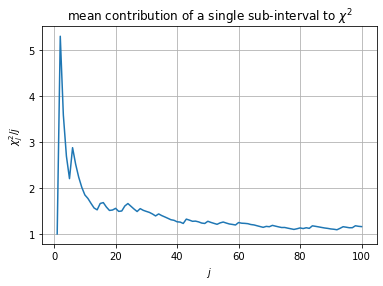

In [5]:
x=np.arange(N)    # Number of sub-intervals of [0,1]
pl.plot(x+1,data['Chi']/(x+1))
pl.xlabel('$j$')
pl.ylabel('$\chi^2_j/j$')
pl.grid(True)
pl.title("mean contribution of a single sub-interval to $\chi^2$")
pl.show()

### Esercizio 01.2
Qui la richiesta era quella di verificare praticamente il range di validità del *Teorema del Limite Centrale* (CLT).\
In particolare ho qui estratto e mediato per $M=10^4$ volte $N=1,2,10,100$ numeri casuali a partire da:

1. una distribuzione uniforme in $[0,1]$
2. una distribuzione esponenziale $p(x) = \lambda \ e^{-\lambda x}$ con $\lambda = 1$
3. una distribuzione di Cauchy-Lorentz $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$ con $\mu=0$ e $\Gamma=1$

Nei primi due casi ho due distribuzioni con media e varianza finite, e quindi entrambe soddisfano le ipotesi del CLT, mentre per la lorentziana $\sigma^2=+\infty$, ed è essa stessa ad agire come bacino di attrazione. Per questi motivi le medie con $N=100$ sono state fittate nei primi due casi con una gaussiana appropriata (stessa media delle due distribuzioni di partenza, varianza ridotta di un fattore $100$) e per la lorentziana con la distribuzione stessa.

Per generare numeri pseudo-casuali nelle forme sopra descritte ho utilizzato il metodo dell'inversa della cumulativa, per cui per estrarre numeri distribuiti secondo $p_x(x)$ è sufficiente calcolare ed invertire (operazione supposta possibile) $y \equiv F_x(x)=\int_{-\infty}^x p_x(t) dt$; ottenuta l'espressione $x=F_x^{-1}(y)$ basta estrarre $y$ uniformemente in $[0,1)$ per avere $x$ secondo $p_x(x)$.

In [6]:
from scipy.stats import norm, cauchy
import math

M=int(1e4)                   # Number of realizations of S(N)
names='1','2','10','100'

def vlines(mu,sigma):
    pl.axvline(x=mu,color='k',linewidth=0.5)   # black line for central Gaussian value
    pl.axvline(x=mu+sigma,color='k',linewidth=0.5,linestyle='--')   # 1_sigma deviation
    pl.axvline(x=mu-sigma,color='k',linewidth=0.5,linestyle='--')

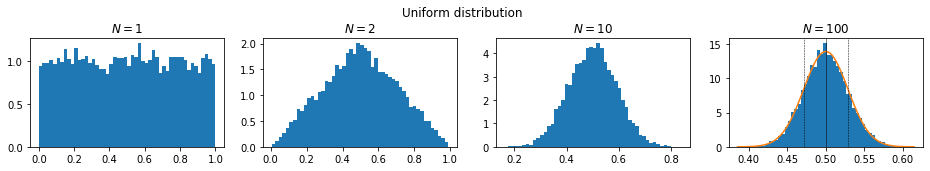

Gaussian fit: mu =  0.5001143674999999    sigma =  0.028637423954983168
100*var - 1/12 =  -0.0013231282555889595


In [7]:
Unif=np.genfromtxt('res02.out',max_rows=M,names=names)
mu,sigma = np.mean(Unif['100']),np.sqrt(np.var(Unif['100']))  #gaussian fitting parameters
x=np.linspace(mu-4*sigma,mu+4*sigma,100)

pl.figure('fig1',figsize=(16,2))
for i in range(4):
    pl.subplot(1,4,i+1)
    pl.hist(Unif[names[i]],bins=50,density=True) # normalized hist to produce a probability distribution and graphically check Guassian convergence
    pl.title(r'$N='+names[i]+'$')
    if i==3: pl.plot(x,norm.pdf(x,mu,sigma)); vlines(mu,sigma)      # plotting Gaussian fitting function

pl.suptitle('Uniform distribution',y=1.1)
pl.show()

print("Gaussian fit: mu = ",mu,"   sigma = ",sigma)
print("100*var - 1/12 = ",100*sigma**2-1/12)

Qui risulta evidente il risultato descritto dal CLT, per cui per $N$ sufficientemente grande (qui, ma anche nel seguito, $N=100$ risulta sufficiente) la distribuzione della media di $N$ variabili casuali indipendenti ed estratte da distribuzioni identiche tende nello spazio delle distribuzioni di probabilità verso la distribuzione gaussiana centrata in $\mu$ e con varianza $\sigma^2/N$, dove $\mu$ e $\sigma^2$ sono rispettivmente la media e la varianza della generica distribuzione di partenza (in questo caso specifico $\mu=0.5$ e $\sigma^2=1/12$).\
Nell'ultimo grafico la curva arancione rappresenta proprio la predizione del CLT, mentre le linee nere verticali evidenziano il valor medio atteso e la deviazione a $1\sigma$ attesi dal teorema.

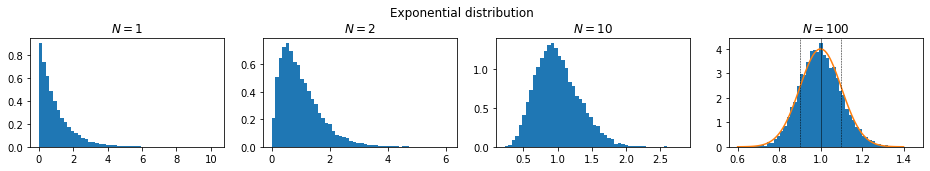

Gaussian fit: mu =  0.9984027522000001    sigma =  0.09980796693651162
100*var - 1 =  -0.0038369736000203325


In [8]:
Exp=np.genfromtxt('res02.out',skip_header=M+2,max_rows=M,names='1,2,10,100')
mu,sigma = np.mean(Exp['100']),np.sqrt(np.var(Exp['100']))
x=np.linspace(mu-4*sigma,mu+4*sigma,100)

pl.figure('fig2',figsize=(16,2))
for i in range(4):
    pl.subplot(1,4,i+1)
    pl.hist(Exp[names[i]],bins=50,density=True)
    pl.title(r'$N='+names[i]+'$')
    if i==3: pl.plot(x,norm.pdf(x,mu,sigma)); vlines(mu,sigma)

pl.suptitle('Exponential distribution',y=1.1)
pl.show()

print("Gaussian fit: mu = ",mu,"   sigma = ",sigma)
print("100*var - 1 = ",100*sigma**2-1)

I commenti sono gli stessi della figura precedente, a parte il fatto che qui $\mu=1/\lambda=1$ e $\sigma^2=1/\lambda^2=1$

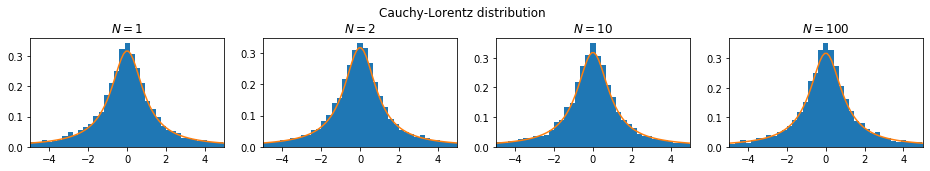

In [9]:
Lor=np.genfromtxt('res02.out',skip_header=2*(M+2),max_rows=M,names='0,1,2,3')
mu,Gamma=0,1   # the cauchy distribution is stable so its parameters are unchanged (CLT hypotesis are not verified, infinite variance)
x=np.linspace(mu-6*Gamma,mu+6*Gamma,100)

pl.figure('fig3',figsize=(16,2))
for i in range(4):
    pl.subplot(1,4,i+1)
    pl.hist(Lor[str(i)],bins=75,range=(-10,10),density=True)
    pl.plot(x,cauchy.pdf(x,mu,Gamma))
    pl.xlim(left=-5,right=5)
    pl.title(r'$N='+names[i]+'$')

pl.suptitle('Cauchy-Lorentz distribution',y=1.1)
pl.show()

Qui il CLT non è applicabile: la distribuzione di Cauchy-Lorentz ha varianza infinita e non rispetta dunque le ipotesi del teorema. La distribuzione è inoltre stabile (cioè è invariante a meno di fattori scalari sotto l'operazione di convoluzione), e quindi è essa stessa il proprio attrattore nello spazio delle distribuzioni: per ogni valore di $N$ scelto la distribuzione seguita dalla media sarà sempre la distribuzione di partenza stessa. Le curve arancioni nei grafici rappresentano proprio questa curva lorentziana.

### Esercizio 01.3

Nell'ultimo esercizio ho simulato l'esperimento di Buffon per la stima di $\pi$.

Si può dimostrare che la probabiità che un bastoncino di lunghezza $L$, lanciato su un piano orizzontale segnato da una serie di rette parallele tra loro a distanza $d>L$, cada intersecando una di queste rette è $P = 2L/\pi d$. Da qui la possibilità, per un numero di lanci $N_{thr}$ sufficientemente grande, di produrre una stima di $\pi$:
$$\pi = \frac{2L}{PD} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}D}$$
Nella mia simulazione ho seguito ancora il blocking method, per cui ho suddiviso i $M=10^7$ lanci totali in $N=200$ blocchi, arrivando ad avere $N_{thr} \equiv Mb = 5 \times 10^4$ in ogni copia dell'esperimento. Ho inoltre scelto $L=0.5$ e $D=1$ e considerato un numero $N_{lines}=10^4$ di linee orizzontali, la prima delle quali posizionata in $y=0$ e l'ultima in $y=(N_{lines}-1)D$.

Per simulare il lancio casuale del bastoncino ho estratto uniformemente l'ordinata del punto medio del bastoncino e la sua inclinazione. Quest'ultima operazione può essere fatta estraendo semplicemente in modo uniforme un numero intero in $[0,\pi)$ (angoli negativi rappresentano situazioni fisiche equivalenti), ma ho voluto in questo problema fare a meno della conoscenza a priori del valore esatto di $\pi$. Per scegliere casualmente l'inclinazione ho quindi estratto uniformemente due numeri $x,y$ tra $[-1,1)$ fintanto che il punto con queste coordinate non fosse contenuto all'interno della circonferenza unitaria, per poi considerare come valore dell'angolo quello formato dal segmento che collega il punto all'origine con l'asse delle ascisse.

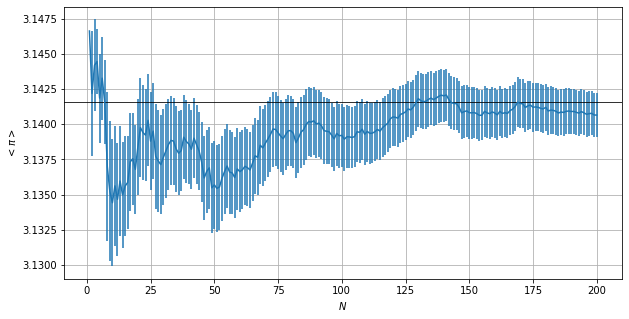

In [10]:
N=np.loadtxt('res03.out',delimiter=',',max_rows=1)  # Number of blocks
Pi=np.genfromtxt('res03.out',skip_header=1,delimiter=',',names='res,err')
x=np.arange(N)         # [0,1,2,...,N-1]

pl.figure(figsize=(10,5))
pl.errorbar(x+1,Pi['res'],yerr=Pi['err'])
pl.xlabel('$N$')
pl.ylabel('$<\pi>$')
pl.grid(True)
pl.axhline(y=math.pi,color='k',linewidth=0.8)
pl.show()

Il risultato è compatibile col vero valore di $\pi$. Per ottenere una buona compatibilità e rendere affidabile il processo stocastico è necessario però avere scelte un numero sufficientemente grande di linee.